# NumPy

The NumPy library provides support for arrays, matricies and mathematical functions to operate on them. We'll start with the basics and then cover a few more advanced topics.

## The N-dimensional array (ndarray) and array basics

The core of NumPy is the n-dimensional array (ndarray). Although it may seem similar to Python lists or the array.array class, there are some important differences. ndarrays ...

+ are homogenous, all elements must be of the same type (unlike list)
+ can be multidimensional (unlike array.array)
+ have much more functionality

We'll dive in with an example. The arange function is analogous to Python's range function, while reshape does exactly what you would expect and reshapes an array into a specified shape.

+ ndarray.ndim: number of dimensions or rank
+ ndarray.shape: tuple containing the dimensions of the array
+ ndarray.dtype: data type of elements
+ ndarray.size: total number of elements (product of dimensions)

### Library Dependancies
Need numpy, operator, matplotlib, collections. The operator and collections modules come pre-installed in the Python Standard Library. Install the rest using pip: ```pip install numpy```, ```pip install matplotlib```.

In [137]:
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt


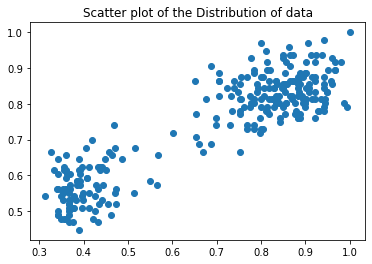

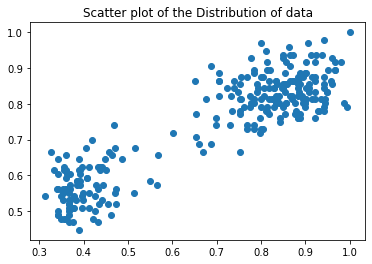

This is the DF ______ 
     eruptions   waiting
1     0.705882  0.822917
2     0.352941  0.562500
3     0.653529  0.770833
4     0.447647  0.645833
5     0.888824  0.885417
..         ...       ...
268   0.807255  0.843750
269   0.421569  0.479167
270   0.866078  0.937500
271   0.356275  0.479167
272   0.875882  0.770833

[272 rows x 2 columns]
___________ 
This is the Point ______ 
eruptions    0.885686
waiting      0.833333
Name: 88, dtype: float64
0.8856862745098041
0.8333333333333334
___________ 


,eruptions,waiting
1,0.705882,0.822917
2,0.352941,0.562500
3,0.653529,0.770833
4,0.447647,0.645833
5,0.888824,0.885417
...,...,...
268,0.807255,0.843750
269,0.421569,0.479167
270,0.866078,0.937500
271,0.356275,0.479167


In [138]:
from cmath import sqrt
from math import dist, exp

df = pd.read_csv('geyserData.csv') # Read in data as dataframe
df = df.reset_index(drop=True) # Remove the index from the file
df['class'] = 1 # Assign all points to class 1
df['eruptions'] = df['eruptions'] / max(df['eruptions']) # Normalize eruptions
df['waiting'] = df['waiting'] / max(df['waiting']) # Normalize waiting

plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['eruptions'],df['waiting'])              # Visualizing the distribution
plt.show()         

df = pd.read_csv (r'/Users/jakobtolstrup/Desktop/Areas/SD/Data Mining/Exercises 5/k-means-clustering/geyserData.csv', delimiter=',')

with open('/Users/jakobtolstrup/Desktop/Areas/SD/Data Mining/Exercises 5/k-means-clustering/geyserData.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Get all rows of csv from csv_reader object as list of tuples
    list_of_tuples = list(map(tuple, csv_reader))
    # display all rows of csv
    #print("list_of_tuples ", list_of_tuples)


dfm1 = df["eruptions"].mean()
dfm2 = df["waiting"].mean()

dfsd1 = df["eruptions"].std()
dfsd2 = df["waiting"].std()

# print("dfsd1 ", dfsd1)
# print("dfsd2 ", dfsd2)


df['eruptions'] = df['eruptions'] / max(df['eruptions']) # Normalize eruptions
df['waiting'] = df['waiting'] / max(df['waiting']) # Normalize waiting

plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['eruptions'],df['waiting'])              # Visualizing the distribution
plt.show()        

#STEP 1: Select the number of clusters we want
k = 2

#4
clusterCentres = [[-1,-1], [1,1]]

#5
# create an list dp and populate it with 0 for each row of df
clusterIds = []

# Not sure what this is doing
for i in range(len(df)):
    clusterIds.append(0)


#a - Track how many points move each iteration so we know when to stop
# Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
# return two pandas dataframes (or pandas series) with mean1 and mean2

#STEP 2: Randomly select k data points. These will be the initial clusters
def initializeMeans(df):
    x = df.sample(2) # Here we pick two random points consisting of x and y coordinate
    cluster1 = x.iloc[0] # This gives me the specific point of x
    cluster2 = x.iloc[1]

    return cluster1, cluster1

initializeMeans(df)


def euclideanDist(df,pointIDX,mean1,mean2):

    # What we basically want to do, is to take the dataframe, take some point, and then compare the point to the two means that we also take.
    # We want to see which is closest to them. The one that is closest is assigned 2 and the one that is farest away is assigned 1
    # Return the dataframe where the class of the 

    """
    Take the index of the point in the dataframe you want to calculate the 
    distance from and calculate the euclidean distance to both means.
    
    return a pandas dataframe (or pandas series) with the closest mean assigned to column 'class' given the pointIDX
    """

    # We seperate the values from our inputs into seperate points
    mp1, mp2 = mean1
    mq1, mq2 = mean2
    pp1, pp2 = pointIDX

    # We calculate the distance between the points and the
    dist1 = sqrt((mp1-pp1)**2 + (mp2+pp2)**2).real
    dist2 = sqrt((mq1-pp1)**2 + (mq2+pp2)**2).real
    
    #Here we get the index of our point

    print("This is the DF ______ ")
    print(df)
    print("___________ ")

    print("This is the Point ______ ")
    print(pointIDX)
    print(pointIDX.eruptions)
    print(pointIDX.waiting)
    print("___________ ")

    
    # eruptions =  xxxx 


    # print("df.index[pointIDX]") 
    # df.index[pointIDX]

    #find the index of the point in the data
    

    # # Which cluster is closest to point
    # if(dist1 > dist2):
    #     df.iat[point, 2] = 1
    # else:
    #     df.iat[point, 2] = 2

    return df # here we return the same dataframe

testPoint = df.sample(1).iloc[0] #Here we initialize a testpoint to test the function above
m1, m2 = initializeMeans(df)



# print("m1 ", m1)
# print("m2 ", m2)

euclideanDist(df,testPoint, m1, m2)

    # Next we update means. 

    
    # Find all the points for the first and second class and update the means


    # Then the algo itself
    # It matters how many iterations we have. 

    # Step 1: Itereate random means
    # once we've updated mean we compare the cluster to the mean once more

    # """
    # Take the index of the point in the dataframe you want to calculate the 
    # distance from and calculate the euclidean distance to both means.
    
    # return a pandas dataframe (or pandas series) with the closest mean assigned to column 'class' given the pointIDX
    # """

In [160]:
e = testPoint.eruptions
w = testPoint.waiting

r = df[(df.eruptions == e) & (df.waiting == w)]
i = r
i.index[0]


88